# Criando os nomes

In [2]:
import pandas as pd

In [3]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [4]:
print("Quantidade de nomes " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes 400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
116,DOMINGOS
145,FRANCIELE
12,RAFAEL
23,LARISSA
166,MICHEL


# Incluindo ID dos alunos

In [8]:
import numpy as np

In [9]:
np.random.seed(123)

In [10]:
total_alunos = len(nomes)

In [11]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [12]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [13]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos) 

In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


# Criando a tabela cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml

In [17]:
import html5lib

In [18]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
cursos = cursos[0]

# Alterando o Index de cursos

In [20]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [21]:
cursos['id'] = cursos.index + 1

In [22]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [23]:
cursos = cursos.set_index('id')

In [24]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [25]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [26]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,1


In [27]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [28]:
import seaborn as sns

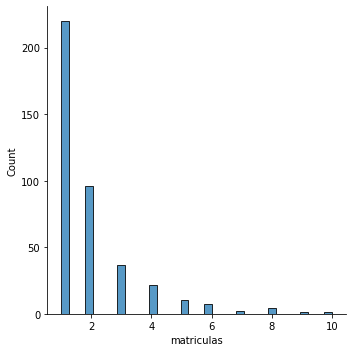

In [29]:
sns.displot(nomes.matriculas)

In [30]:
nomes.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [31]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@servicodoemail.com,caua@servicodoemail.com,2
36,DEBORA,338,@dominiodoemail.com.br,debora@dominiodoemail.com.br,1
135,ROSILENE,387,@servicodoemail.com,rosilene@servicodoemail.com,2
176,CELIO,388,@servicodoemail.com,celio@servicodoemail.com,3
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com,1


In [32]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [33]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,4
2,43,4
3,43,4
4,43,10


In [34]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web
4,89,Ruby on Rails
5,10,Cursos de Python
6,26,PHP com MySql
7,5,.NET para web
8,9,Novas integrações com Java
9,12,TDD com Java


In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
128,JOICE,357,@servicodoemail.com,joice@servicodoemail.com,2
57,IGOR,345,@dominiodoemail.com.br,igor@dominiodoemail.com.br,2
15,LETICIA,347,@servicodoemail.com,leticia@servicodoemail.com,1
55,DANIELE,25,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,2
168,IARA,82,@dominiodoemail.com.br,iara@dominiodoemail.com.br,4


In [36]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [37]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,4
2,43,4
3,43,4
4,43,10


In [38]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

In [39]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web
4,89,Ruby on Rails
5,10,Cursos de Python


# Saída em diferentes formatos

In [40]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [41]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,51,Lógica de programação
1,30,Java para Web
2,63,C# para Web
3,89,Ruby on Rails
4,10,Cursos de Python
5,26,PHP com MySql
6,5,.NET para web
7,9,Novas integrações com Java
8,12,TDD com Java
9,42,Código limpo com C#


In [42]:
matriculas_json = matriculas_por_curso.to_json()

In [43]:
matriculas_json

'{"quantidade_de_alunos":{"1":51,"2":30,"3":63,"4":89,"5":10,"6":26,"7":5,"8":9,"9":12,"10":42,"11":75,"12":24,"13":48,"14":63,"15":65,"16":4,"17":32,"18":17,"19":25,"20":78},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [44]:
matriculas_html = matriculas_por_curso.to_html()

In [45]:
display(matriculas_html)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>51</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>30</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>63</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>89</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>10</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>26</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>5</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>9</td>\n      <td>Novas integrações com Java</td>\n  

# Criando o Banco SQL

In [46]:
!pip install sqlalchemy

In [47]:
from sqlalchemy import create_engine, MetaData, Table

In [48]:
engine = create_engine('sqlite:///:memory:')

In [49]:
engine

Engine(sqlite:///:memory:)

In [50]:
type(engine)

sqlalchemy.engine.base.Engine

In [51]:
matriculas_por_curso.to_sql('matriculas', engine)

In [52]:
print(engine.table_names())

['matriculas']


# Buscando do banco SQL

In [53]:
query ='select * from matriculas where quantidade_de_alunos < 20'

In [54]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,10,Cursos de Python
1,7,5,.NET para web
2,8,9,Novas integrações com Java
3,9,12,TDD com Java
4,16,4,Estatística básica
5,18,17,Programação funcional


In [55]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,51
1,Java para Web,30
2,C# para Web,63
3,Ruby on Rails,89
4,Cursos de Python,10
5,PHP com MySql,26
6,.NET para web,5
7,Novas integrações com Java,9
8,TDD com Java,12
9,Código limpo com C#,42


In [56]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [57]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [58]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
3,Ruby on Rails,89


# Escrevendo no banco

In [59]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [60]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos Alunos e Alunas da Próxima Turma

In [61]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web
4,89,Ruby on Rails
5,10,Cursos de Python
6,26,PHP com MySql
7,5,.NET para web
8,9,Novas integrações com Java
9,12,TDD com Java


In [62]:
id_curso = 5

In [63]:
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
70,333,5
101,27,5
116,193,5
138,108,5
157,203,5
292,91,5
366,137,5
441,123,5
475,164,5
667,77,5


In [64]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
333,5,ROSANGELA,@dominiodoemail.com.br,rosangela@dominiodoemail.com.br,1
27,5,RAFAELA,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,2
193,5,ALESSANDRA,@servicodoemail.com,alessandra@servicodoemail.com,2
108,5,LUIZA,@dominiodoemail.com.br,luiza@dominiodoemail.com.br,3
203,5,TATIANE,@servicodoemail.com,tatiane@servicodoemail.com,2
91,5,LORENA,@dominiodoemail.com.br,lorena@dominiodoemail.com.br,7
137,5,DALVA,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,2
123,5,EDSON,@dominiodoemail.com.br,edson@dominiodoemail.com.br,3
164,5,MARIO,@servicodoemail.com,mario@servicodoemail.com,5


In [65]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
333     ROSANGELA
27        RAFAELA
193    ALESSANDRA
108         LUIZA
203       TATIANE
91         LORENA
137         DALVA
123         EDSON
164         MARIO
77           CAUA
Name: nome, dtype: object

In [66]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
333,ROSANGELA
27,RAFAELA
193,ALESSANDRA
108,LUIZA
203,TATIANE
91,LORENA
137,DALVA
123,EDSON
164,MARIO


In [67]:
nome_curso = cursos.loc[id_curso]

In [68]:
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [69]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [70]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [71]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do curso de Cursos de Python
id_aluno,
333,ROSANGELA
27,RAFAELA
193,ALESSANDRA
108,LUIZA
203,TATIANE
91,LORENA
137,DALVA
123,EDSON
164,MARIO


# Excel

In [72]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)